# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-03-02 07:45:55--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M   132MB/s    in 0.2s    

2023-03-02 07:45:58 (132 MB/s) - ‘train.csv’ saved [29470338/29470338]



## Inspect Data

In [1]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [2]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label)

In [3]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] = df['title'] + " " + df["lead"]

In [5]:
# TODO print the number of documents for each label
df["label"].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

In [6]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

<AxesSubplot:xlabel='label'>

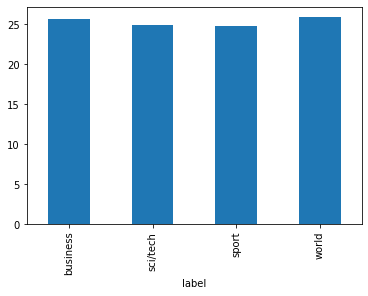

In [24]:
# TODO create a new column with the number of non-stop words in each text
df["non_stop_words"] = df["text"].apply(lambda x: len(list(set(x.split(" ")) - set(stop_words))))
# TODO plot the average number of non-stop words per label 
df.groupby("label")["non_stop_words"].mean().plot(kind="bar")

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") and numbers appear in the different classes in our data

In [37]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern for keyword
    x = keyword
    pattern = re.compile(x)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print (df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)
        df['freq']= df["text"].apply(count_keyword_frequencies)
        print(df.groupby("label")['freq'].sum())
        #TODO print how often the keyword appears in this class
    print ("*" * 100)

6955
label: business , keyword: play
label
business     297
sci/tech    1459
sport       4851
world        348
Name: freq, dtype: int64
label: sci/tech , keyword: play
label
business     297
sci/tech    1459
sport       4851
world        348
Name: freq, dtype: int64
label: sport , keyword: play
label
business     297
sci/tech    1459
sport       4851
world        348
Name: freq, dtype: int64
label: world , keyword: play
label
business     297
sci/tech    1459
sport       4851
world        348
Name: freq, dtype: int64
****************************************************************************************************
1290
label: business , keyword: tax
label
business    998
sci/tech     87
sport        26
world       179
Name: freq, dtype: int64
label: sci/tech , keyword: tax
label
business    998
sci/tech     87
sport        26
world       179
Name: freq, dtype: int64
label: sport , keyword: tax
label
business    998
sci/tech     87
sport        26
world       179
Name: freq, dtype: in

As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

In [ ]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(...)

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset

In [38]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

65280

In [39]:
!open homework_01.html

/bin/bash: open: command not found
